In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
!kaggle datasets download -d likhon148/animal-data

100% 36.3M/36.3M [00:00<00:00, 129MB/s] 
100% 36.3M/36.3M [00:00<00:00, 101MB/s]


In [9]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!unzip /content/animal-data.zip

Load and prepare the data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
path = "/content/animal_data"
batch_size = 32
image_size = (224, 224)

In [54]:
image_gen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

In [56]:
train_data = image_gen.flow_from_directory(
    path,
    target_size=image_size,
    batch_size=batch_size,
)
test_data = image_gen.flow_from_directory(
  path,
    target_size=image_size,
    batch_size=batch_size,
)
valid_data = image_gen.flow_from_directory(
    path,
    target_size=image_size,
    batch_size=batch_size,
)

Found 1944 images belonging to 15 classes.
Found 1944 images belonging to 15 classes.
Found 1944 images belonging to 15 classes.


In [57]:
train_data.class_indices

{'Bear': 0,
 'Bird': 1,
 'Cat': 2,
 'Cow': 3,
 'Deer': 4,
 'Dog': 5,
 'Dolphin': 6,
 'Elephant': 7,
 'Giraffe': 8,
 'Horse': 9,
 'Kangaroo': 10,
 'Lion': 11,
 'Panda': 12,
 'Tiger': 13,
 'Zebra': 14}

In [58]:
classes_name = ['Bear',
 'Bird' ,
 'Cat' ,
 'Cow' ,
 'Deer' ,
 'Dog' ,
 'Dolphin' ,
 'Elephant' ,
 'Giraffe' ,
 'Horse' ,
 'Kangaroo' ,
 'Lion' ,
 'Panda',
 'Tiger',
 'Zebra']

Exception ignored in: <function _xla_gc_callback at 0x7878dc9d8dc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


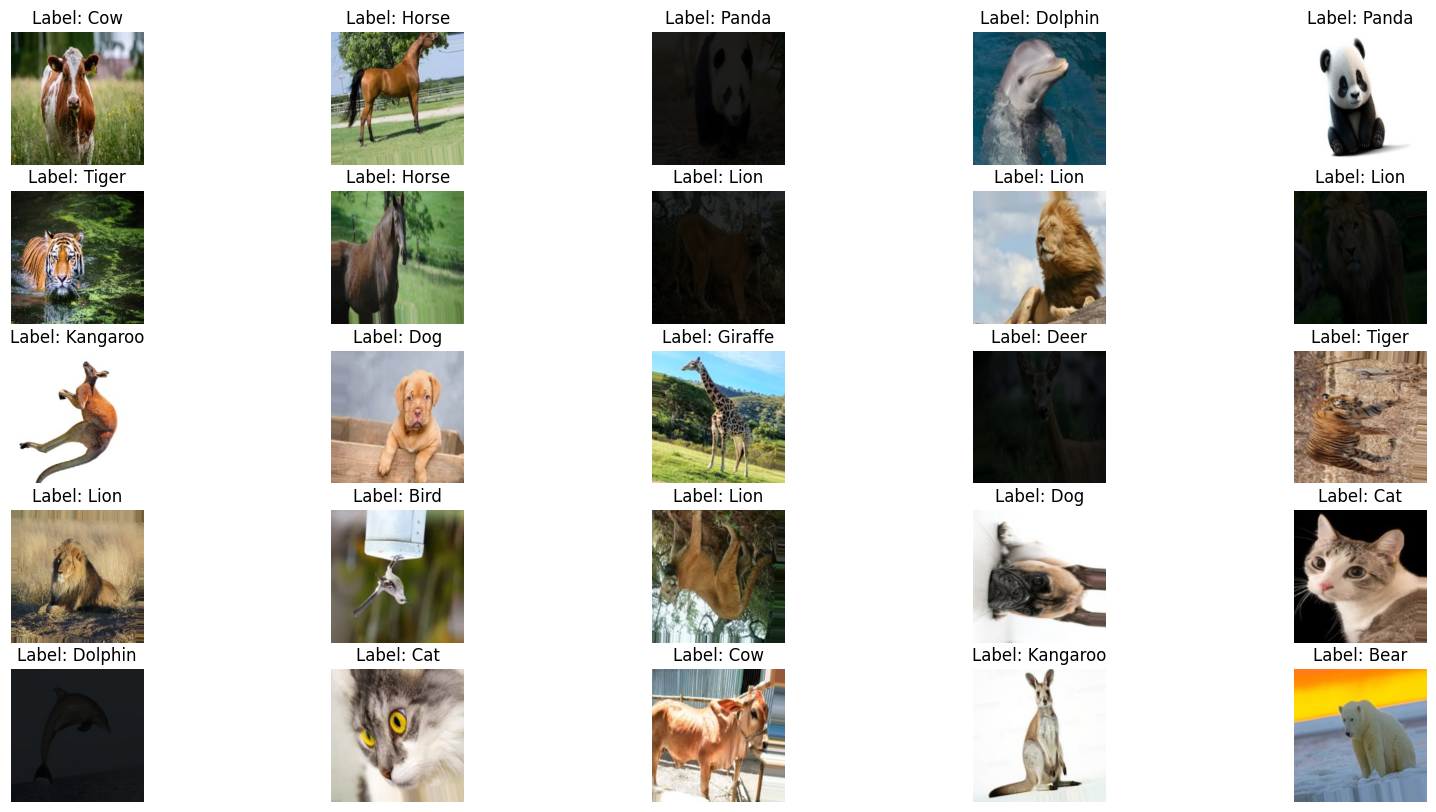

In [60]:
images, labels = next(train_data)

plt.figure(figsize=(20, 10))
for i in range(25):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {classes_name[labels[i].argmax()]}')
    plt.axis('off')
plt.show()

In [61]:
from tensorflow import keras

In [62]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15, activation="softmax")
])

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_29 (Ba  (None, 222, 222, 64)      256       
 tchNormalization)                                               
                                                                 
 activation_29 (Activation)  (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 111, 111, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 batch_normalization_30 (Ba  (None, 109, 109, 64)     

In [70]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)

In [71]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [72]:
history = model.fit(train_data, epochs=30, validation_data=valid_data, callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/30
61/61 [==============================] - 53s 801ms/step - loss: 2.4818 - accuracy: 0.2130 - val_loss: 2.9947 - val_accuracy: 0.0741
Epoch 2/30
61/61 [==============================] - 50s 829ms/step - loss: 2.0305 - accuracy: 0.3611 - val_loss: 3.0954 - val_accuracy: 0.0998
Epoch 3/30
61/61 [==============================] - 67s 1s/step - loss: 1.8575 - accuracy: 0.4023 - val_loss: 3.1361 - val_accuracy: 0.1219
Epoch 4/30
61/61 [==============================] - 49s 808ms/step - loss: 1.7526 - accuracy: 0.4419 - val_loss: 2.8288 - val_accuracy: 0.1656
Epoch 5/30
61/61 [==============================] - 48s 792ms/step - loss: 1.6428 - accuracy: 0.4717 - val_loss: 3.0170 - val_accuracy: 0.1667
Epoch 6/30
61/61 [==============================] - 50s 814ms/step - loss: 1.5622 - accuracy: 0.5170 - val_loss: 2.7295 - val_accuracy: 0.2212
Epoch 7/30
61/61 [==============================] - 49s 804ms/step - loss: 1.4261 - accuracy: 0.5509 - val_loss: 2.5236 - val_accuracy: 0.2742
Ep

In [73]:
loss, acc = model.evaluate(test_data)

61/61 [==============================] - 24s 388ms/step - loss: 0.6195 - accuracy: 0.8050


In [74]:
print(f"Loss = {round(loss * 100, 2) }% Accuracy = {round(acc * 100, 2) }%")

Loss = 61.95% Accuracy = 80.5%


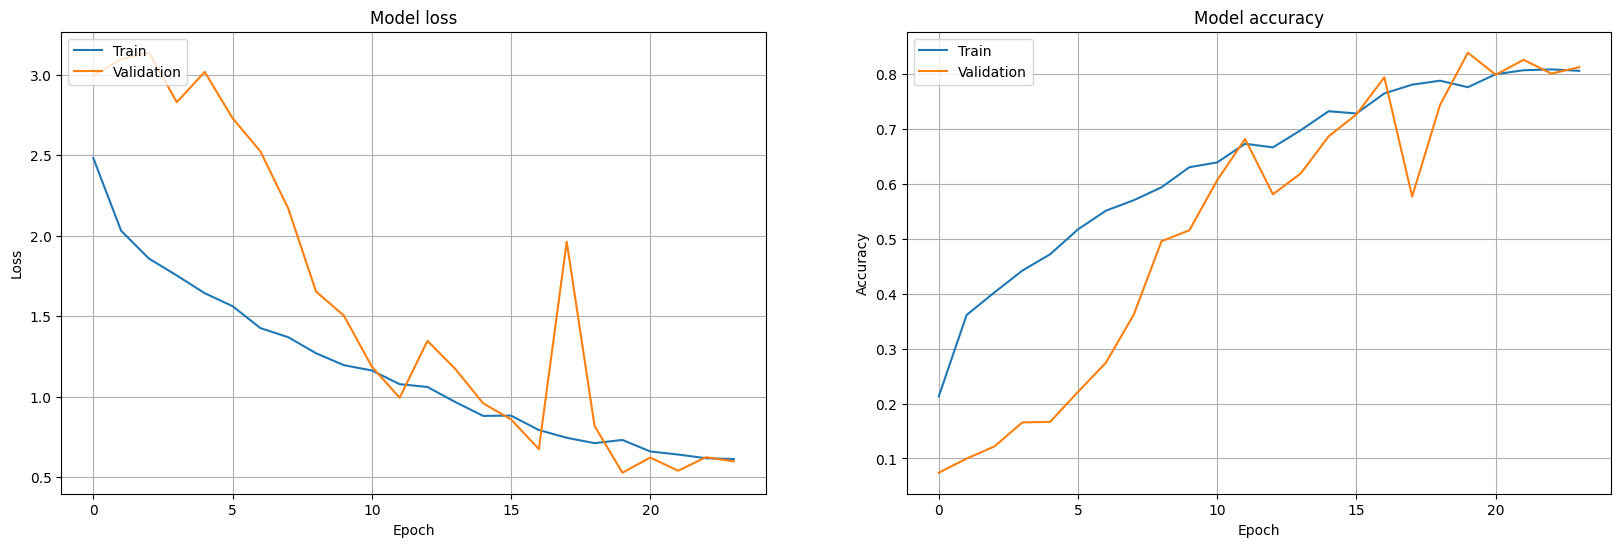

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()

In [76]:
model.save("animal.keras")